In [1]:
# germinacion a temperatura optimal 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [92]:
data = pd.read_csv("germination.csv")
data

,id,temp,species,start,end,germinated
0,1,10,wheat,0,1,0
1,2,10,wheat,1,2,0
2,3,10,wheat,2,3,0
3,4,10,wheat,3,4,0
4,5,10,wheat,4,5,0
...,...,...,...,...,...,...
187,188,40,rice,13,14,0
188,189,40,rice,14,16,0
189,190,40,rice,16,17,0
190,191,40,rice,17,18,0


In [5]:
rice = data[data.species == "rice"]
rice

,id,temp,species,start,end,germinated
40,41,16,rice,0,2.0,0
41,42,16,rice,2,3.0,0
42,43,16,rice,3,4.0,0
43,44,16,rice,4,5.0,0
44,45,16,rice,5,6.0,0
...,...,...,...,...,...,...
187,188,40,rice,13,14.0,0
188,189,40,rice,14,16.0,0
189,190,40,rice,16,17.0,0
190,191,40,rice,17,18.0,0


In [144]:
# filtrando los datos para no incluir "inf"
# filtrando los datos para incluir solo wheat
wheat = data[(data.species == "wheat") & (data.end != 11111)]
# & (data.end != "inf")
#wheat_no_inf = wheat[data.end != 11111]
wheat
#wheat_no_inf

,id,temp,species,start,end,germinated
0,1,10,wheat,0,1,0
1,2,10,wheat,1,2,0
2,3,10,wheat,2,3,0
3,4,10,wheat,3,4,0
4,5,10,wheat,4,5,0
...,...,...,...,...,...,...
169,170,40,wheat,12,13,0
170,171,40,wheat,13,14,0
171,172,40,wheat,14,16,0
172,173,40,wheat,16,17,0


In [7]:
rice.temp 

40     16
41     16
42     16
43     16
44     16
       ..
187    40
188    40
189    40
190    40
191    40
Name: temp, Length: 79, dtype: int64

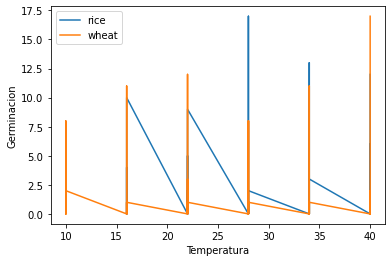

In [8]:
plt.plot(rice.temp, rice.germinated)
plt.plot(wheat.temp, wheat.germinated)
plt.legend(["rice", "wheat"])
plt.xlabel("Temperatura")
plt.ylabel("Germinacion")
plt.show()   
# necesita agruparlo por temperatura (se puede utilizar gráfico de barra o línea ya agrupado)
# compararlo con gráfico de barra (utilizando dos colores)

In [9]:
wheat.temp.iloc[0:17]  

0     10
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
16    10
Name: temp, dtype: int64

In [10]:
wheat.species.iloc[0:17] 

0     wheat
1     wheat
2     wheat
3     wheat
4     wheat
5     wheat
6     wheat
7     wheat
8     wheat
9     wheat
10    wheat
11    wheat
12    wheat
13    wheat
14    wheat
15    wheat
16    wheat
Name: species, dtype: object

In [18]:
wheat.germinated.iloc[0:17] 

0     0
1     0
2     0
3     0
4     0
5     4
6     6
7     8
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    2
Name: germinated, dtype: int64

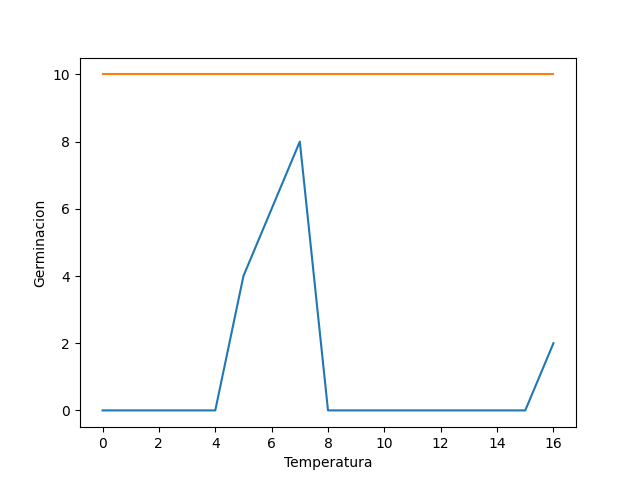

In [29]:
plt.plot(wheat.germinated.iloc[0:17]) 
plt.plot(wheat.temp.iloc[0:17]) 
plt.ylabel("Germinacion")
plt.xlabel("Temperatura")
plt.show() 

In [12]:
mungbean = data[data.species =="mungbean"]
mungbean

,id,temp,species,start,end,germinated
17,18,10,mungbean,0,2.0,0
18,19,10,mungbean,2,3.0,4
19,20,10,mungbean,3,4.0,0
20,21,10,mungbean,4,5.0,0
21,22,10,mungbean,5,6.0,9
22,23,10,mungbean,6,7.0,7
23,24,10,mungbean,7,inf,0
55,56,16,mungbean,0,1.0,0
56,57,16,mungbean,1,2.0,1
57,58,16,mungbean,2,3.0,7


In [152]:
#mungbean[["temp", "germinated"]] 
mungbean[["start", "end"]] 
# servio
# agrupado por periodo de tiempo y sumando lo germinado en ese periodo
df_a = mungbean.groupby(["start", "end"], as_index=False, sort=False).agg({'germinated': 'sum'})
df_a

,start,end,germinated
0,0,2.0,0
1,2,3.0,11
2,3,4.0,12
3,4,5.0,0
4,5,6.0,9
5,6,7.0,7
6,7,inf,0
7,0,1.0,0
8,1,2.0,1
9,5,inf,0


In [14]:
mungbean.temp.iloc[16:24] 

Series([], Name: temp, dtype: int64)

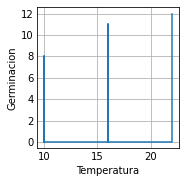

In [94]:
plt.plot(wheat.temp.iloc[0:34], wheat.germinated[0:34]) 
#plt.plot(mungbean.germinated[17:23], mungbean.temp.iloc[17:23]) 
plt.ylabel("Germinacion")
plt.xlabel("Temperatura")
plt.show() 

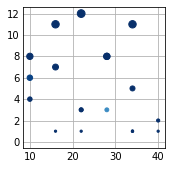

In [142]:
#plt.style.use('_mpl-gallery')
import numpy as np
x = wheat.temp.iloc[0:174] #[1,2,3,4]
y = wheat.germinated[0:174] #[7,8,9,10]
fig, ax = plt.subplots()
sizes = [i * 5 for i in y]
colors = np.random.uniform(15, 90, len(y))
#ax.scatter(x, y, s=sizes, c=colors, vmax=20)
ax.scatter(x, y, s=sizes, c=colors, vmax=20)
#ax.set(xlim=(5,45), xticks=[5,10,15,20,25,30,35,40,45], ylim=(0,20), yticks=[0,2,4,6,8,10,12,14,16,18,20])
plt.show()

In [108]:
wheat_gb_sum = wheat.groupby(['temp'], as_index=False, sort=False).agg({'germinated': 'sum'})
wheat_gb_sum
#wheat_gb = wheat.groupby(['temp', 'germinated'], as_index=False, sort=False).agg({'germinated': 'sum'})
#wheat_gb

,temp,germinated
0,10,18
1,16,19
2,22,19
3,28,19
4,34,19
5,40,3


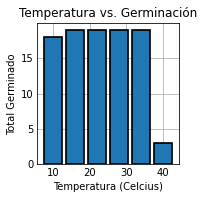

In [148]:
# x = wheat_gb_sum.temp 
# y = wheat_gb_sum.germinated 
fig, ax = plt.subplots()
ax.bar(wheat_gb_sum.temp, wheat_gb_sum.germinated, width=5, edgecolor="black", linewidth=1.7)
#ax.bar(wheat_gb_sum.temp, wheat_gb_sum.germinated)
ax.set_title("Temperatura vs. Germinación")
plt.xlabel('Temperatura (Celcius)')
plt.ylabel('Total Germinado')
plt.show()
plt.close()

In [134]:
# WHEAT - Análisis de Temperatura vs. Germinación

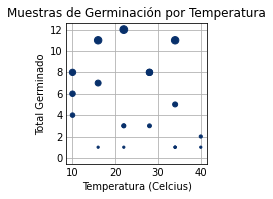

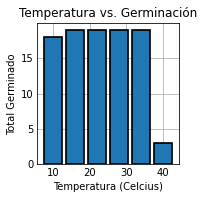

In [143]:
import numpy as np
x = wheat.temp
y = wheat.germinated
fig, ax = plt.subplots()
sizes = [i * 5 for i in y]
colors = np.random.uniform(15, 90, len(y))
ax.scatter(x, y, s=sizes, c=colors, vmax=20)
ax.set_title("Muestras de Germinación por Temperatura")
plt.xlabel('Temperatura (Celcius)')
plt.ylabel('Total Germinado')
fig, ax = plt.subplots()
ax.bar(wheat_gb_sum.temp, wheat_gb_sum.germinated, width=5, edgecolor="black", linewidth=1.7)
ax.set_title("Temperatura vs. Germinación")
#ax.bar(wheat_gb_sum.temp, wheat_gb_sum.germinated)
plt.xlabel('Temperatura (Celcius)')
plt.ylabel('Total Germinado')
#fig.tight_layout()
plt.show()
plt.close()

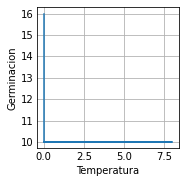

In [113]:
plt.plot(wheat.germinated.iloc[0:17], wheat.temp.iloc[0:17]) 
plt.plot(mungbean.germinated.iloc[17:23], mungbean.temp.iloc[17:23]) 
plt.ylabel("Germinacion")
plt.xlabel("Temperatura")
plt.show()   

In [135]:
#Plot for wheat 
# plot(germLL.3, log="", ylim=c(0, 1), xlim=c(0, 20), 
# level=c("wheat:10", "wheat:16", "wheat:22", "wheat:28", "wheat:34", "wheat:40"), 
# lty=c("dashed","dotted","dotdash","longdash","twodash","232A"), lwd = 1.5,
# xlab="Time (days)", 
# ylab="Proportion germinated", 
# main="Wheat",
# legendPos=c(3, 1.05), 
# legendText=c(expression(10*degree), expression(16*degree), expression(22*degree), 
# expression(28*degree), expression(34*degree), expression(40*degree)))  

In [133]:
# muestra gráficos de línea con valores aleatorios

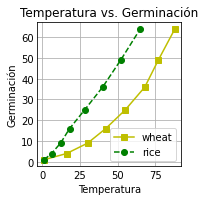

In [132]:
y = [1, 4, 9, 16, 25,36,49, 64]
x1 = [1, 16, 30, 42,55, 68, 77,88]
x2 = [1,6,12,18,28, 40, 52, 65]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(x1,y,'ys-') # solid line with yellow colour and square marker
l2 = ax.plot(x2,y,'go--') # dash line with green colour and circle marker
ax.legend(labels = ('wheat', 'rice'), loc = 'lower right') # legend placed at lower right
ax.set_title("Temperatura vs. Germinación")
ax.set_xlabel('Temperatura')
ax.set_ylabel('Germinación')
plt.show()